In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from diagram_utils import *
import sys
import os

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
N = 30
D = 2
R = dag.minkowski_interval(N, D)
G_ = dag.causal_set_graph(R)
G = transitive_reduction(G_)
nx.set_node_attributes(G, nx.get_node_attributes(G_, 'position'), 'position')
LP = nx.dag_longest_path(G)

/home/nkozak/.pyenv/versions/3.11.6/envs/dag/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


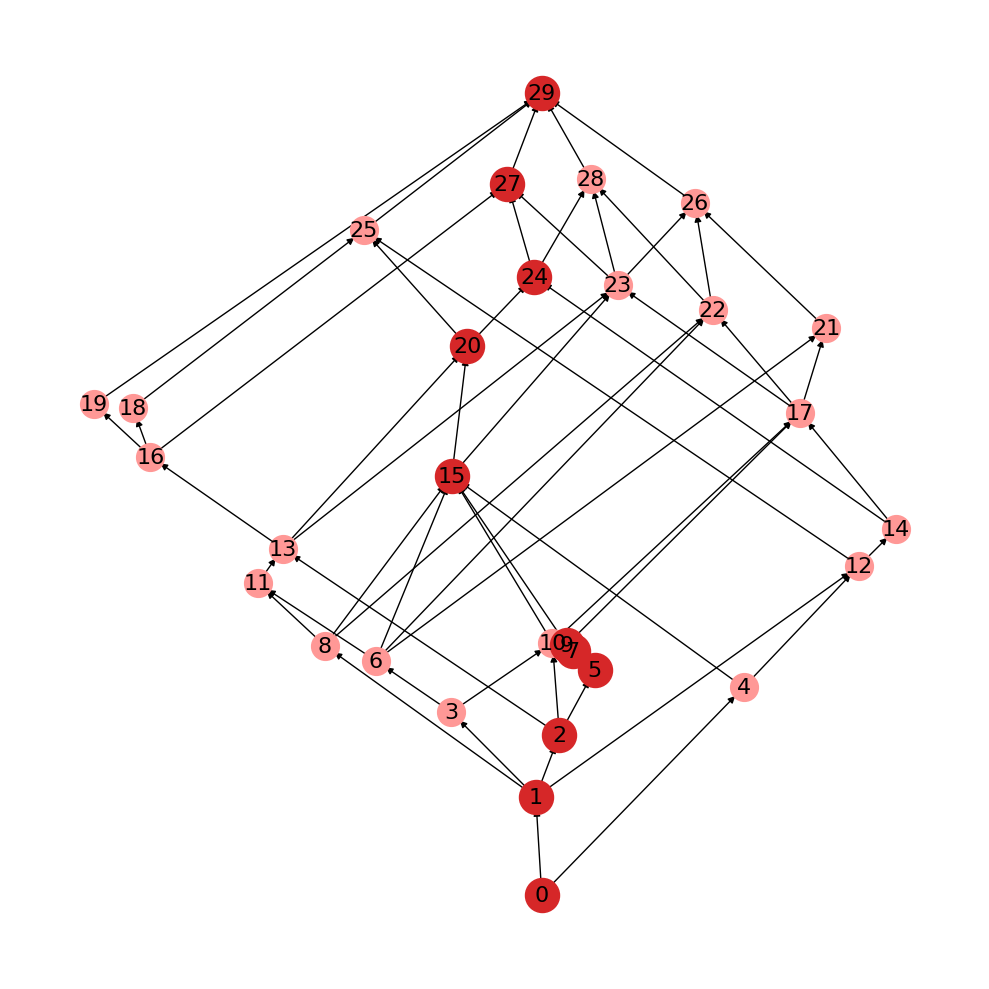

In [4]:
plt.figure(figsize=(10,10))

pos = {i:G.nodes[i]['position'][::-1] for i in G.nodes()}
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if x not in LP], 
                       node_size=400, node_color=tableau20[7])
nx.draw_networkx_nodes(G, pos, nodelist=LP, 
                       node_size=600, node_color=tableau20[6])
nx.draw_networkx_edges(G, pos)

labels = {i:i for i in G.nodes()}
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.tight_layout()
plt.show()